# HR Analytics Project 

# Problem Statement:

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

# Pace: Plan Stage

In [1]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load Dataset
HR = pd.read_csv("HR_comma_sep.csv")
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Exploration (Initial EDA and data cleaning)

In [3]:
HR.shape

(14999, 10)

In [4]:
#Information about the data 
HR.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
HR.describe(include=['object'])

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
#rename columns
HR = HR.rename(columns ={'Work_accident': 'work_accident','average_montly_hours': 'average_monthly_hours','time_spend_company':'tenure','Department':'department'}
              )
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
#check missing values
HR.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
#check for duplicates
HR.duplicated().sum()

3008

3,008 rows contain duplicates.

In [11]:
HR[HR.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
#Drop duplicates and save resulting dataframe in a new variable
HR1 = HR.drop_duplicates(keep='first')
HR1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
HR1.shape

(11991, 10)

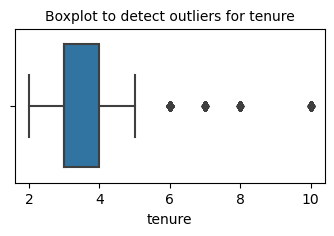

In [14]:
#Check for outliers in the data.
#Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(4,2))
plt.title('Boxplot to detect outliers for tenure', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.boxplot(x=HR1['tenure'])
plt.show()

In [15]:
#Determine the number of rows containing outliers 
#Compute the 25th percentile value in `tenure`
percentile25 = HR1['tenure'].quantile(0.25)

#Compute the 75th percentile value in `tenure`
percentile75 = HR1['tenure'].quantile(0.75)

#Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

#Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#Identify subset of data containing outliers in `tenure`
outliers = HR1[(HR1['tenure'] > upper_limit) | (HR1['tenure'] < lower_limit)]

#Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# Pace: Analyze Stage

# Data Exploration (Continue EDA)

In [16]:
#Get numbers of people who left vs. stayed
HR1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [17]:
HR1['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

0: stayed 
1: left

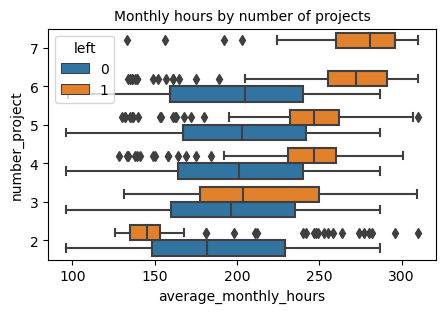

In [18]:
#Create a plot 
fig, ax = plt.subplots(figsize = (5,3))
#Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed 
#vs those who left
sns.boxplot(data=HR1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
ax.invert_yaxis()
ax.set_title('Monthly hours by number of projects', fontsize='10')
plt.show()

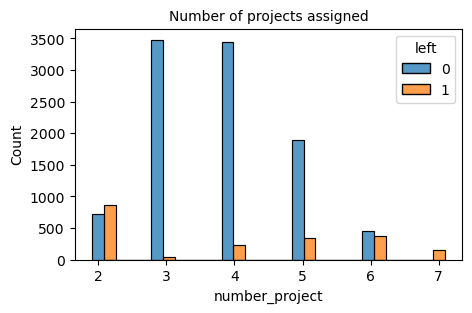

In [19]:
#Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(figsize = (5,3))
tenure_stay = HR1[HR1['left']==0]['number_project']
tenure_left = HR1[HR1['left']==1]['number_project']
sns.histplot(data=HR1, x='number_project', hue='left', multiple='dodge', shrink=2)
ax.set_title('Number of projects assigned', fontsize='10')
plt.show()

In [20]:
#Get value counts of stayed vs left for employees with 7 projects
HR1[HR1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave.

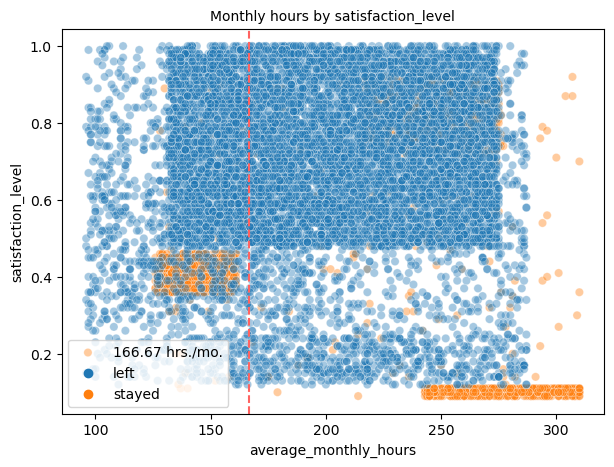

In [21]:
#Create a plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=HR1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--') #vertical line across the axes
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction_level', fontsize='10')
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.
The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to infer about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

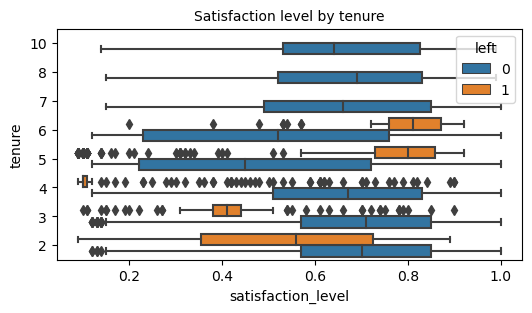

In [22]:
#Create a plot 
fig, ax = plt.subplots(figsize = (6,3))
#Create boxplot showing `satisfaction_level` distributions for `tenure`, comparing employees who stayed vs those who left
sns.boxplot(data=HR1, x='satisfaction_level', y='tenure', hue='left', orient="h")
ax.invert_yaxis()
ax.set_title('Satisfaction level by tenure', fontsize='10')
plt.show()

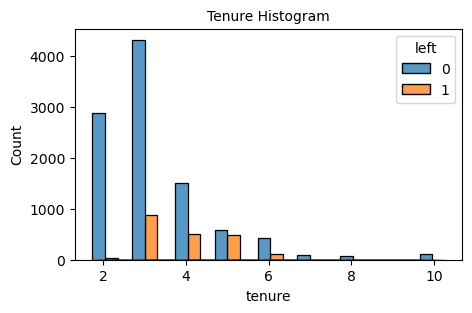

In [23]:
#Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(figsize = (5,3))
tenure_stay = HR1[HR1['left']==0]['number_project']
tenure_left = HR1[HR1['left']==1]['number_project']
sns.histplot(data=HR1, x='tenure', hue='left', multiple='dodge', shrink=7)
ax.set_title('Tenure Histogram', fontsize='10')
plt.show()

In [24]:
#Calculate mean and median satisfaction scores of employees who left and those who stayed
HR1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


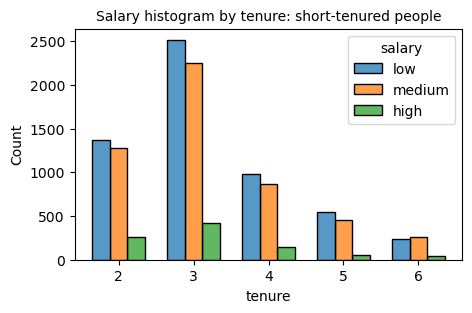

In [25]:
#Create a plot  
fig, ax = plt.subplots(figsize = (5,3))
#Define short-tenured employees
tenure_short = HR1[HR1['tenure'] < 7]
#Define long-tenured employees
tenure_long = HR1[HR1['tenure'] > 6]

#Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.7)
ax.set_title('Salary histogram by tenure: short-tenured people', fontsize='10')
plt.show()

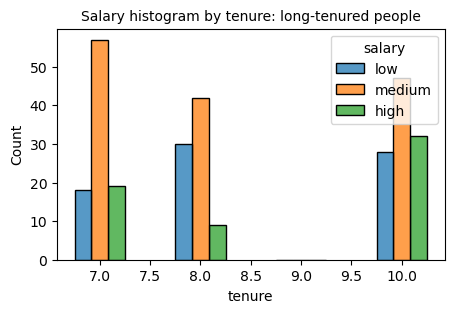

In [26]:
#Plot long-tenured histogram
fig, ax = plt.subplots(figsize = (5,3))
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
ax.set_title('Salary histogram by tenure: long-tenured people', fontsize='10')
plt.show()

The plots above show that long-tenured employees were not unreasonably comprised of higher-paid employees.

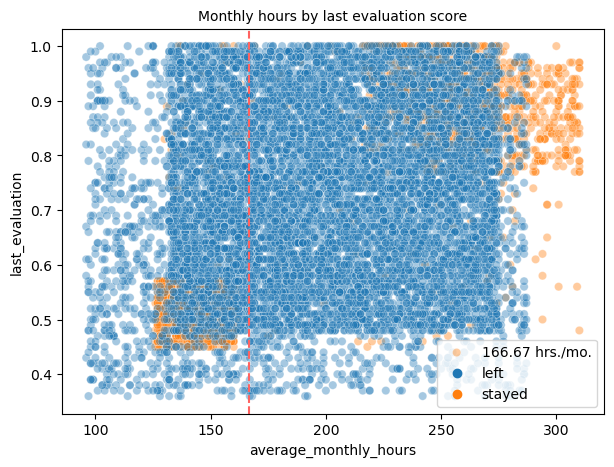

In [27]:
#Create a plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=HR1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--') #vertical line across the axes
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='10')
plt.show()

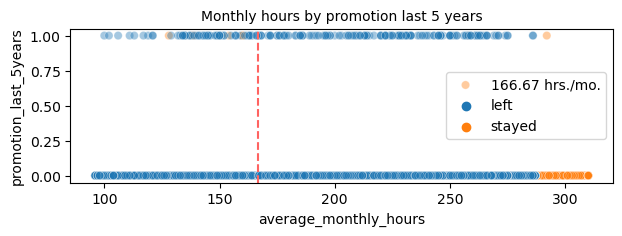

In [28]:
#Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(7,2))
sns.scatterplot(data=HR1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='10')
plt.show()

From the plot, very few employees who were promoted in the last five years left and all of the employees who left were working the longest hours.

In [29]:
#Display counts for each department
HR1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

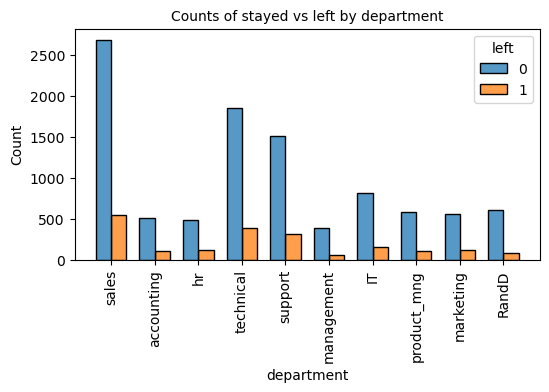

In [30]:
#Create histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(6,3))
sns.histplot(data=HR1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.7)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed vs left by department', fontsize=10)
plt.show()

There doesn't seem to be any department that differs much in its proportion of employees who left to those who stayed.

/var/folders/kq/ctwz3m3578ldgn2jcmvrrfq80000gp/T/ipykernel_79181/1734763494.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(HR.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


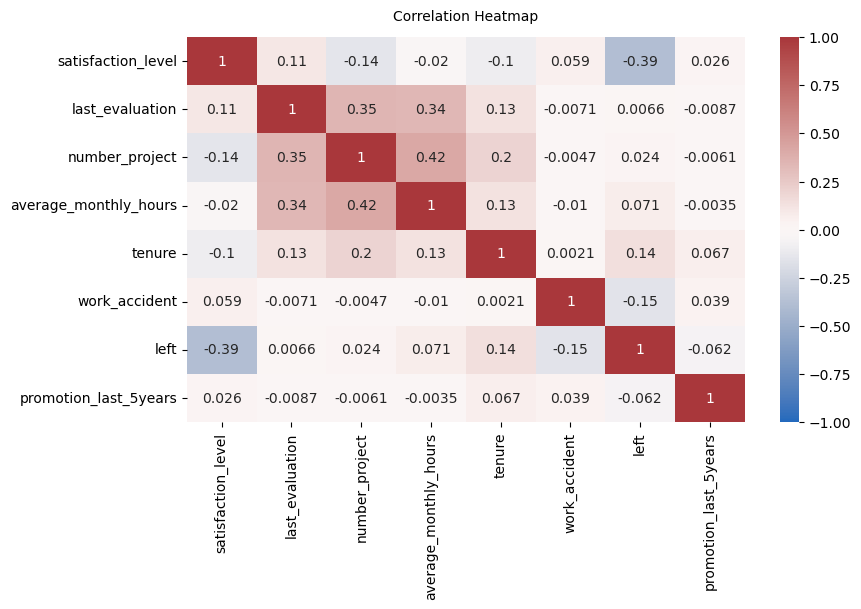

In [31]:
#Plot a correlation heatmap
plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(HR.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)
plt.show()

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# Pace: Construct Stage

# Model Building

In [32]:
#Copy the dataframe
HR2 = HR1.copy()

#Encode the `salary` column as an ordinal numeric category
HR2['salary'] = (HR2['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

#Dummy encode the `department` column
HR2 = pd.get_dummies(HR2, drop_first=False)

#Display the new dataframe
HR2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


0:low 1:medium 2:high

In [33]:
HR2.shape

(11991, 19)

In [34]:
#Select rows without outliers in `tenure` and save resulting dataframe in a new variable
HR3 = HR2[(HR2['tenure'] >= lower_limit) & (HR2['tenure'] <= upper_limit)]

#Display first few rows of new dataframe
HR3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
HR3.shape

(11167, 19)

# Simple Logistic Regression

In [36]:
#import packages
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn import metrics 

In [37]:
#Define independent and dependent variables
x_HR_simple = HR3.drop('left', axis=1) 
y_HR_simple = HR3['left']

In [38]:
#Divide the dataset into training and test sets 
x_HR_simple_train, x_HR_simple_test, y_HR_simple_train, y_HR_simple_test = train_test_split(x_HR_simple, y_HR_simple, test_size=0.25, random_state=42)

In [39]:
#Initialize the Logistic Regression Model
simple_model = LogisticRegression(random_state=42)

In [40]:
#Fit the model on the training data
simple_model.fit(x_HR_simple_train, y_HR_simple_train)

/Users/shivanisankaran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [41]:
#Train Accuracy
simple_model.score(x_HR_simple_train,y_HR_simple_train)

0.8287761194029851

In [42]:
#Test Accuracy
simple_model.score(x_HR_simple_test,y_HR_simple_test)

0.8237822349570201

In [43]:
#Predict the values on the test set
y_HR_simple_pred = simple_model.predict(x_HR_simple_test)

In [44]:
#Build a confusion matrix
conf_matrix_simple = confusion_matrix(y_HR_simple_test, y_HR_simple_pred) 
print('Confusion Matrix for Simple Logistic Regression:\n', conf_matrix_simple) 

Confusion Matrix for Simple Logistic Regression:
 [[2177  128]
 [ 364  123]]


True negatives - 2177: The number of people who did not leave that the model accurately predicted did not leave.

False positives - 128: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives - 364: The number of people who left that the model inaccurately predicted did not leave

True positives - 123: The number of people who left the model accurately predicted as leaving

In [45]:
HR3['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [46]:
#Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_HR_simple_test, y_HR_simple_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2305
    Predicted would leave       0.49      0.25      0.33       487

                 accuracy                           0.82      2792
                macro avg       0.67      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. 

In [47]:
prob_test_1=simple_model.predict_proba(x_HR_simple_test)[:,1] #return the probabilities of a classification label

In [48]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    false_positive_rate, true_positive_rate, threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(false_positive_rate,true_positive_rate)
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.legend()
    plt.show()
    return result

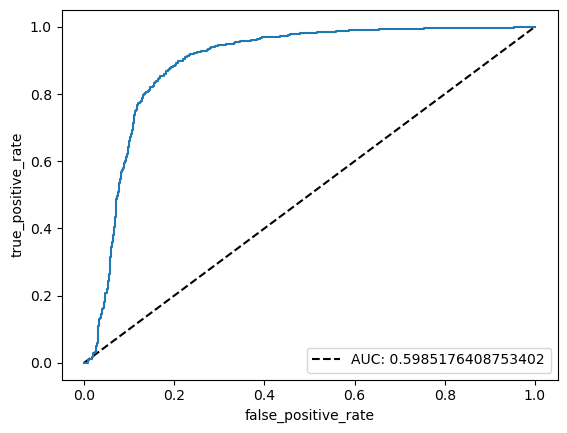

{'Accuracy': 0.8237822349570201,
 'Recall': 0.25256673511293637,
 'Precision': 0.4900398406374502,
 'F1 score': 0.33333333333333337,
 'AUC': 0.5985176408753402}

In [49]:
 classification_eva(y_HR_simple_test,y_HR_simple_pred,prob_test_1)

# Decision Tree (Round -1):

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
#Define independent and dependent variables
x_HR_tree = HR3.drop('left', axis=1) 
y_HR_tree = HR3['left']

In [52]:
#Divide the dataset into training and test sets 
x_HR_tree_train, x_HR_tree_test, y_HR_tree_train, y_HR_tree_test = train_test_split(x_HR_tree, y_HR_tree, test_size=0.25, random_state=42)

In [53]:
#using RandomizedsearchCV for hyperparameter tuning
params = {"criterion":["gini", "entropy"], 
"max_depth": [4,6,8,None],
"min_samples_split" :[2,4,6],
"min_samples_leaf" : [1,2,5]
       }
#Initialize the model
model_tree = DecisionTreeClassifier(random_state=0)

#Initialize RandomizedSearchCV
random_search_tree = RandomizedSearchCV(estimator=model_tree,param_distributions=params , cv=4, n_jobs=2)

#Train the model
random_search_tree.fit(x_HR_tree_train, y_HR_tree_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 4, 6]})

In [54]:
random_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)

In [55]:
#training the model using best values of hyperparameters
DecisionTree_HR = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [56]:
#Fit the model on the training data
DecisionTree_HR.fit(x_HR_tree_train, y_HR_tree_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [57]:
#Train Accuracy
DecisionTree_HR.score(x_HR_tree_train,y_HR_tree_train) 

0.9859104477611941

In [58]:
#Test Accuracy
DecisionTree_HR.score(x_HR_tree_test,y_HR_tree_test) 

0.9835243553008596

In [59]:
#Predict the values on the test set
y_pred_DecisionTree_HR = DecisionTree_HR.predict(x_HR_tree_test)

In [60]:
#Classification Report
print(metrics.classification_report(y_HR_tree_test,y_pred_DecisionTree_HR))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2305
           1       0.98      0.92      0.95       487

    accuracy                           0.98      2792
   macro avg       0.98      0.96      0.97      2792
weighted avg       0.98      0.98      0.98      2792



In [61]:
prob_test_2 = DecisionTree_HR.predict_proba(x_HR_tree_test)[:,1] #return the probabilities of a classification label

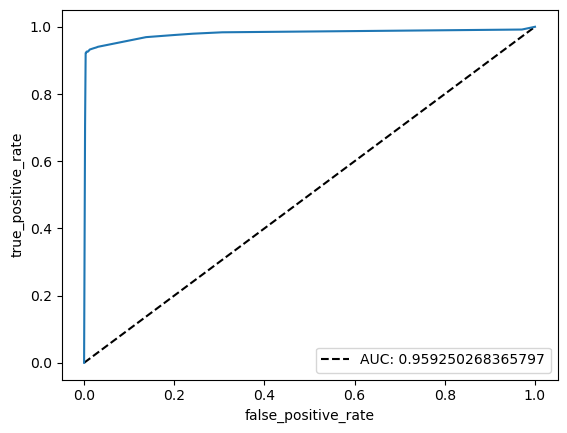

{'Accuracy': 0.9835243553008596,
 'Recall': 0.9219712525667351,
 'Precision': 0.9824945295404814,
 'F1 score': 0.9512711864406781,
 'AUC': 0.959250268365797}

In [62]:
#Model Evaluation
classification_eva(y_HR_tree_test,y_pred_DecisionTree_HR,prob_test_2)

# Random Forest (Round-1):

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
#Divide the dataset into training and test sets 
x_HR_randomforest_train, x_HR_randomforest_test, y_HR_randomforest_train, y_HR_randomforest_test = train_test_split(x_HR_tree, y_HR_tree, test_size=0.25, random_state=1)

In [65]:
#using RandomizedsearchCV for hyperparameter tuning
params_Rf_HR = {"criterion":["entropy"],
          "max_depth":[3,15,None],
          "min_samples_split":[2,3,4],
          "min_samples_leaf":[1,2,3],
          "n_estimators":[300,500],
          "max_features":[1.0],
          "max_samples":[.7,1.0]
          }

RandomSearch_Rf_HR = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_Rf_HR,cv=4)
RandomSearch_Rf_HR.fit(x_HR_randomforest_train,y_HR_randomforest_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [3, 15, None],
                                        'max_features': [1.0],
                                        'max_samples': [0.7, 1.0],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [300, 500]})

In [66]:
RandomSearch_Rf_HR.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=1.0,
                       max_samples=0.7, min_samples_split=4, n_estimators=300)

In [67]:
#training the model using best values of hyperparameters
Rf_HR = RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0, min_samples_leaf=3, min_samples_split=4,
                               n_estimators=300, random_state=0)

In [68]:
#Fit the model on the training data
Rf_HR.fit(x_HR_randomforest_train, y_HR_randomforest_train)

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=300, random_state=0)

In [69]:
#Train Accuracy
Rf_HR.score(x_HR_randomforest_train,y_HR_randomforest_train) 

0.9837611940298507

In [70]:
#Test Accuracy
Rf_HR.score(x_HR_randomforest_test,y_HR_randomforest_test)

0.9803008595988538

In [71]:
#Predict the values on the test set
y_pred_randomforest = Rf_HR.predict(x_HR_randomforest_test)

In [72]:
#Classification Report
print(metrics.classification_report(y_HR_randomforest_test,y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2316
           1       0.96      0.92      0.94       476

    accuracy                           0.98      2792
   macro avg       0.97      0.96      0.96      2792
weighted avg       0.98      0.98      0.98      2792



In [73]:
prob_test_3 = Rf_HR.predict_proba(x_HR_randomforest_test)[:,1] #return the probabilities of a classification label

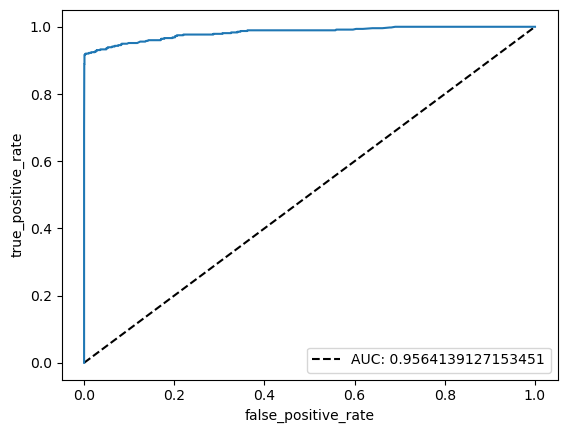

{'Accuracy': 0.9803008595988538,
 'Recall': 0.9201680672268907,
 'Precision': 0.9626373626373627,
 'F1 score': 0.9409237379162192,
 'AUC': 0.9564139127153451}

In [74]:
#Model Evaluation
classification_eva(y_HR_randomforest_test,y_pred_randomforest,prob_test_3)

The scores have high evaluation. There is a chance that there is some data leakage occurring. Data leakage is when we use data to train our model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production. In this case, it's likely that the company won't have satisfaction levels reported for all of its employees.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

# Feature Engineering

In [75]:
#Drop `satisfaction_level` and save resulting dataframe in new variable
HR4 = HR3.drop('satisfaction_level', axis=1)
HR4.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
#Create `overworked` column. For now,assigning average monthly hours to overworked.
HR4['overworked'] = HR4['average_monthly_hours']

#Inspect max and min average monthly hours values
print('Max hours:', HR4['overworked'].max())
print('Min hours:', HR4['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.
Defining overworked as working more than 175 hours per month on average.

In [77]:
#To make the overworked column binary
#Define `overworked` as working > 175 hrs/week
HR4['overworked'] = (HR4['overworked'] > 175).astype(int)

#Display first few rows of new column
HR4['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [78]:
#Define independent and dependent variables
x_tree = HR4.drop('left', axis=1) 
y_tree = HR4['left']

In [79]:
#Divide the dataset into training and test sets 
x_tree_train, x_tree_test, y_tree_train, y_tree_test = train_test_split(x_tree, y_tree, test_size=0.25, random_state=42)

# Decision tree (Round-2)

In [80]:
#using RandomizedsearchCV for hyperparameter tuning
params = {"criterion":["gini", "entropy"], 
"max_depth": [4,6,8,None],
"min_samples_split" :[2,4,6],
"min_samples_leaf" : [1,2,5]
       }
#Initialize the model
model_tree1 = DecisionTreeClassifier(random_state=0)

#Initialize RandomizedSearchCV
random_search_tree1 = RandomizedSearchCV(estimator=model_tree1, param_distributions=params , cv=4, n_jobs=2)

#Train the model
random_search_tree1.fit(x_tree_train, y_tree_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 4, 6]})

In [81]:
random_search_tree1.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=0)

In [82]:
#training the model using best values of hyperparameters
DTree_HR = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)

In [83]:
#Fit the model on the training data
DTree_HR.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)

In [84]:
#Train Accuracy
DTree_HR.score(x_tree_train,y_tree_train) 

0.9788656716417911

In [85]:
#Test Accuracy
DTree_HR.score(x_tree_test,y_tree_test) 

0.9745702005730659

In [86]:
#Predict the values on the test set
y_pred_DTree_HR = DTree_HR.predict(x_tree_test)

In [87]:
#Classification Report
print(metrics.classification_report(y_tree_test,y_pred_DTree_HR))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2305
           1       0.94      0.91      0.93       487

    accuracy                           0.97      2792
   macro avg       0.96      0.95      0.96      2792
weighted avg       0.97      0.97      0.97      2792



In [88]:
prob_test_4 = DTree_HR.predict_proba(x_tree_test)[:,1] #return the probabilities of a classification label

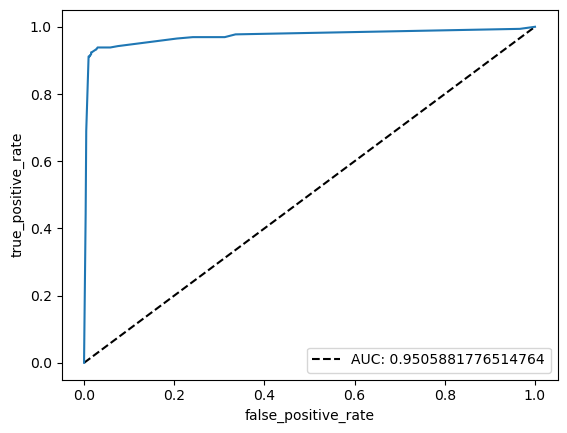

{'Accuracy': 0.9745702005730659,
 'Recall': 0.9137577002053389,
 'Precision': 0.9388185654008439,
 'F1 score': 0.9261186264308012,
 'AUC': 0.9505881776514764}

In [89]:
#Model Evaluation
classification_eva(y_tree_test,y_pred_DTree_HR,prob_test_4)

# Random Forest (Round-2):

In [90]:
#using RandomizedsearchCV for hyperparameter tuning
params_Rf_HR = {"criterion":["entropy"],
          "max_depth":[3,15,None],
          "min_samples_split":[2,3,4],
          "min_samples_leaf":[1,2,3],
          "n_estimators":[300,500],
          "max_features":[1.0],
          "max_samples":[.7,1.0]
          }
#Initialize RandomizedSearchCV
RandomSearch_Rf = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_Rf_HR,cv=4)

#Train the model
RandomSearch_Rf.fit(x_tree_train,y_tree_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [3, 15, None],
                                        'max_features': [1.0],
                                        'max_samples': [0.7, 1.0],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [300, 500]})

In [91]:
RandomSearch_Rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=1.0,
                       max_samples=0.7, min_samples_split=4, n_estimators=300)

In [92]:
#training the model using best values of hyperparameters
Rf = RandomForestClassifier(max_depth=15, max_features=1.0, max_samples=0.7, min_samples_split=4,
                               n_estimators=300, random_state=0)

In [93]:
#Fit the model on the training data
Rf.fit(x_tree_train, y_tree_train)

RandomForestClassifier(max_depth=15, max_features=1.0, max_samples=0.7,
                       min_samples_split=4, n_estimators=300, random_state=0)

In [94]:
#Train Accuracy
Rf.score(x_tree_train,y_tree_train) 

0.9832835820895522

In [95]:
#Test Accuracy
Rf.score(x_tree_test,y_tree_test) 

0.9760028653295129

In [96]:
#Predict the values on the test set
y_pred_rf = Rf.predict(x_tree_test)

In [97]:
#Classification Report
print(metrics.classification_report(y_tree_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2305
           1       0.95      0.91      0.93       487

    accuracy                           0.98      2792
   macro avg       0.97      0.95      0.96      2792
weighted avg       0.98      0.98      0.98      2792



In [98]:
prob_test_5 = Rf.predict_proba(x_tree_test)[:,1] #return the probabilities of a classification label

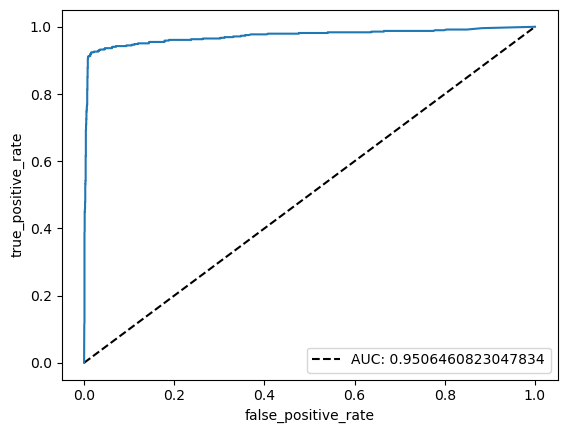

{'Accuracy': 0.9760028653295129,
 'Recall': 0.9117043121149897,
 'Precision': 0.9487179487179487,
 'F1 score': 0.9298429319371728,
 'AUC': 0.9506460823047834}

In [99]:
#Model Evaluation
classification_eva(y_tree_test,y_pred_rf,prob_test_5)

# Conclusion:

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.
After conducting feature engineering, the decision tree model achieved AUC of 95.05%, precision of 93%, recall of 91%, f1-score of 92%, and accuracy of 97%, on the test set. The random forest modestly outperformed the decision tree model.

The models confirm that employees at the company are overworked.